In [1]:
#import libraries
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("tesla.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [3]:
#time format

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Date_ordinal'] = df['Date'].map(pd.Timestamp.toordinal)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Date_ordinal
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,733952
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,733953
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,733954
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,733955
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,733959


In [4]:
#Check the number of rows and columns
df.shape

(2193, 8)

In [5]:
#checking for null entries
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Date_ordinal    0
dtype: int64

In [6]:
df.dropna(inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume,Date_ordinal
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,733952
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,733953
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,733954
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,733955
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,733959
...,...,...,...,...,...,...,...,...
2188,2019-03-11,283.519989,291.279999,280.500000,290.920013,290.920013,7392300,737129
2189,2019-03-12,286.489990,288.070007,281.059998,283.359985,283.359985,7504100,737130
2190,2019-03-13,283.899994,291.989990,282.700012,288.959991,288.959991,6844700,737131
2191,2019-03-14,292.450012,295.390015,288.290009,289.959991,289.959991,7074200,737132


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2193 non-null   datetime64[ns]
 1   Open          2193 non-null   float64       
 2   High          2193 non-null   float64       
 3   Low           2193 non-null   float64       
 4   Close         2193 non-null   float64       
 5   Adj Close     2193 non-null   float64       
 6   Volume        2193 non-null   int64         
 7   Date_ordinal  2193 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 137.2 KB


In [8]:
#checking for null entries
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Date_ordinal    0
dtype: int64

In [9]:
#plot the closing prices

In [10]:
#x and y
x=df[['Date_ordinal','Open','High','Low','Volume']]
y=df['Close']

<Axes: >

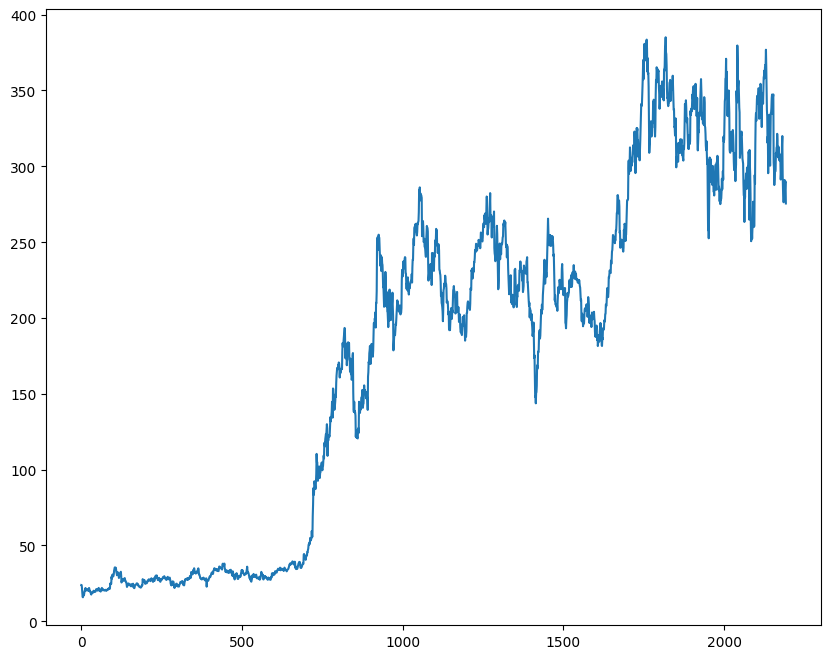

In [11]:
df['Close'].plot(figsize=(10,8))

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

In [13]:
print(x_train.shape,x_test.shape)

(1644, 5) (549, 5)


In [14]:
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [15]:
#print weights and biases
print(regressor.coef_)
print(regressor.intercept_)

[ 1.17663195e-04 -6.42009867e-01  8.61780652e-01  7.78989935e-01
 -1.06854772e-08]
-86.36785929725318


In [16]:
#predicted value
predicted=regressor.predict(x_test)
print(x_test)


      Date_ordinal        Open        High         Low   Volume
489         734660   28.200001   29.450001   28.139999   909900
1063        735494  263.359985  265.600006  262.320007  3692600
1986        736832  284.649994  284.649994  274.000000  7251900
1888        736690  316.000000  317.679993  310.750000  4712100
385         734508   27.200001   27.790001   26.410000   986300
...            ...         ...         ...         ...      ...
1027        735443  226.610001  228.300003  224.860001  3382400
1654        736353  250.000000  254.800003  249.649994  4965500
1967        736807  291.290009  291.619995  282.329987  4893400
654         734903   38.400002   38.419998   37.590000  1128000
1318        735864  261.950012  262.079987  257.579987  2600800

[549 rows x 5 columns]


In [17]:
_df=pd.DataFrame({"Actual":y_test,"Predicted":predicted})
print(_df)

          Actual   Predicted
489    29.219999   29.260399
1063  263.820007  264.287140
1986  276.820007  276.253653
1888  311.640015  313.229564
385    26.910000   27.105500
...          ...         ...
1027  225.009995  226.552918
1654  254.610001  253.774807
1967  283.369995  284.508546
654    37.740002   37.829785
1318  261.059998  258.521646

[549 rows x 2 columns]


In [18]:
regressor.score(x_test,y_test)

0.9997303019050467

In [19]:
import math
print("Mean Absolute Error",metrics.mean_absolute_error(y_test,predicted))
print("Mean Square Error",metrics.mean_squared_error(y_test,predicted))
print("Root Mean Error",math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error 1.2851642835338055
Mean Square Error 3.5800846658636014
Root Mean Error 1.892111166359842


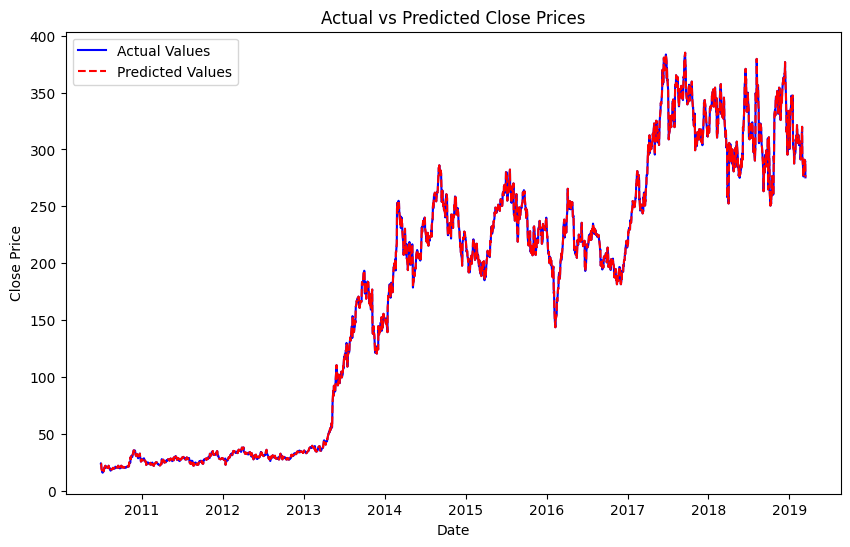

In [20]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], color='blue', label='Actual Values')
plt.plot(df['Date'], df['Close'], color='red', linestyle='dashed', label='Predicted Values')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices')
plt.legend()
plt.show()